In [71]:
import pydicom
import matplotlib.pyplot as plt
import os
import numpy as np
file_dir = os.path.dirname(os.getcwd()) # the directory that options.py resides in

print(file_dir)
root_dir = file_dir.split("/code")[0]
dataset_dir = root_dir+"/dataset"
dataset_dir

/home/mengyi/code/ddib


'/home/mengyi/dataset'

In [72]:
def MaxMinNormalizer(data):
    data_max = np.max(data)
    data_min = np.min(data)
    #print(data_max, data_min)
    data_normalize = (data - data_min) / (data_max - data_min)
    return data_normalize

def window_pixel_array(ds):
    pixel_array = ds.pixel_array
    if 'WindowWidth' in ds and 'WindowCenter' in ds:
        #print("defined")
        window_width = ds.WindowWidth
        window_center = ds.WindowCenter
        if isinstance(window_width, pydicom.valuerep.DSfloat):
            window_width = [window_width]
        if isinstance(window_center, pydicom.valuerep.DSfloat):
            window_center = [window_center]
    
        windowed_image = (pixel_array - (window_center[0] - window_width[0] / 2)) / window_width[0] * 255.0
        windowed_image = np.clip(windowed_image, 0, 255).astype(np.uint16)
    else:
        windowed_image = pixel_array
    
    return windowed_image

def loadPETValue(directory):
    data = []
    for file_name in sorted(os.listdir(directory)):
        full_file_name = os.path.join(directory, file_name)
        ds = pydicom.dcmread(full_file_name)
        pixel_array = ds.pixel_array
        data.append(pixel_array)    
    data = np.array(data)
    return data

def calScaleFactor(data):
    non_zero_elements = data[data > 1]
    # print(data.mean(), non_zero_elements.mean())
    mean_non_zero = non_zero_elements.mean()
    return mean_non_zero


In [73]:
def viewData(data):
    
    flatten_data = data.flatten()
    flatten_data = flatten_data[flatten_data < 2000]
    counts, bins, patches = plt.hist(flatten_data, bins=10, edgecolor='black', alpha=0.7)

    percentages = 100 * counts / len(flatten_data)

    for i in range(len(patches)):
        plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], f'{percentages[i]:.2f}%', 
                ha='center', va='bottom')

    plt.title('Histogram with Percentage')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.show()

    threshold = np.percentile(flatten_data, 99.99)
    return threshold

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20220222'
(0008, 0013) Instance Creation Time              TM: '014726.734400'
(0008, 0016) SOP Class UID                       UI: Positron Emission Tomography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.156.112605.159303470343965.220224104322.4.6352.479420
(0008, 0020) Study Date                          DA: '20211208'
(0008, 0021) Series Date                         DA: '20211208'
(0008, 0022) Acquisition Date                    DA: '20211208'
(0008, 0023) Content Date                        DA: '20220222'
(0008, 002a) Acquisition DateTime                DT: '20211208103523.0304'
(0008, 0030) Study Time                          TM: '103247'
(0008, 0031) Series Time                         TM: '103523.030400'
(0008, 0032) Acquisition Time                    TM: '1

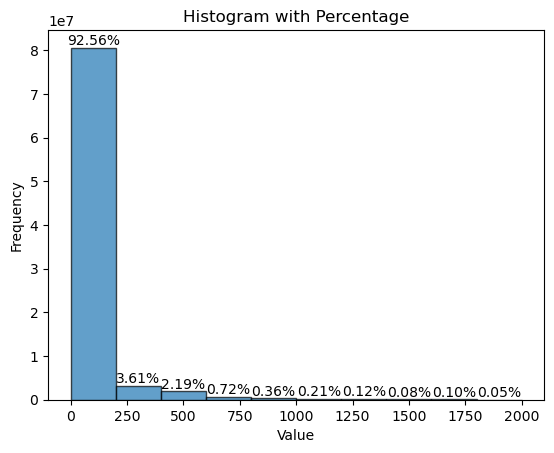

50.05656472997267 397.97796951891667
1935.0 397.97796951891667


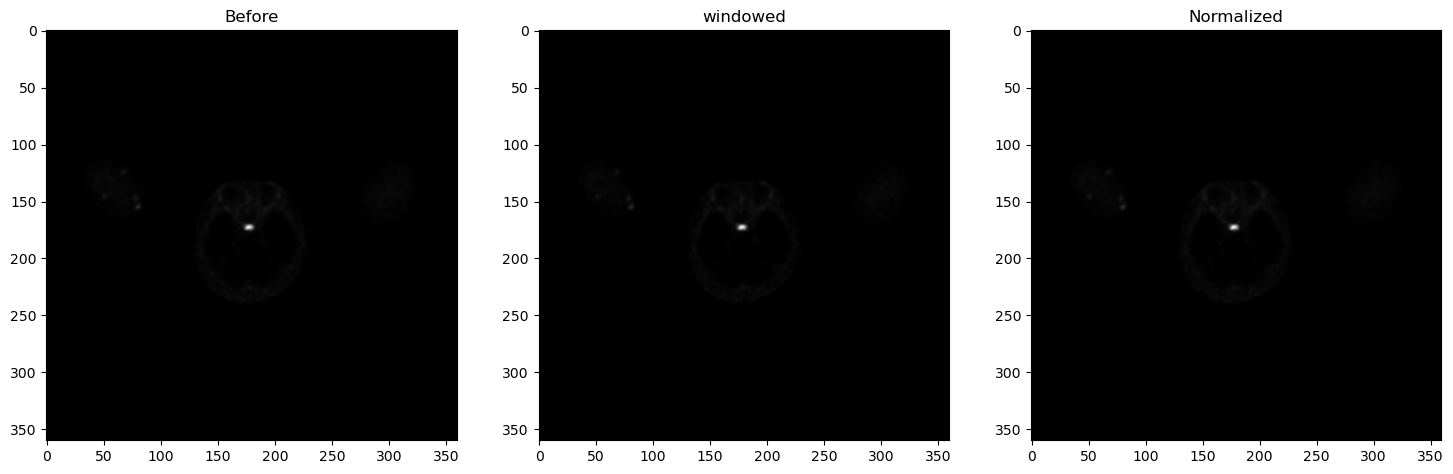

In [85]:
uExplorer_dir = "uExplorer/1st_uExplorer"
file_name = "Anonymous_ANO_20220224_1843069_103247/2.886 x 600 WB NORMAL/00000123.dcm"
full_file_name = os.path.join(dataset_dir, uExplorer_dir, file_name)
ds = pydicom.dcmread(full_file_name)
for elem in ds:
    print(elem)
print(ds.pixel_array)
ds.pixel_array.shape


pixel_array = ds.pixel_array
# if 'WindowWidth' in ds and 'WindowCenter' in ds:
#     print("WindowWidth and WindowCenter are defined.")
#     window_width = ds.WindowWidth
#     window_center = ds.WindowCenter
#     if isinstance(window_width, pydicom.valuerep.DSfloat):
#         window_width = [window_width]
#     if isinstance(window_center, pydicom.valuerep.DSfloat):
#         window_center = [window_center]
    
#     windowed_image = (pixel_array - (window_center[0] - window_width[0] / 2)) / window_width[0] * 255.0
#     windowed_image = np.clip(windowed_image, 0, 255).astype(np.uint16)
# else:
#     windowed_image = pixel_array
dataVolume = loadPETValue(os.path.join(dataset_dir, uExplorer_dir, "Anonymous_ANO_20220224_1824561_122859/2.886 x 600 WB NORMAL"))
threshold = viewData(dataVolume)
scaleFactor = calScaleFactor(dataVolume)
print(threshold, scaleFactor)
windowed_image = (pixel_array) / (scaleFactor * 10) * 255.0
windowed_image = np.clip(windowed_image, 0, 255).astype(np.uint16)

normalized_image = MaxMinNormalizer(pixel_array)
original_image = pixel_array*255.0/ds.WindowWidth

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap="gray")
plt.title('Before')
plt.subplot(1,3,2)
plt.imshow(windowed_image, cmap="gray")
plt.title('windowed')
plt.subplot(1,3,3)
plt.imshow(normalized_image, cmap="gray")
plt.title('Normalized')
plt.show()

20.524984682552784 229.11692324363568
1145.5846162181783 229.11692324363568


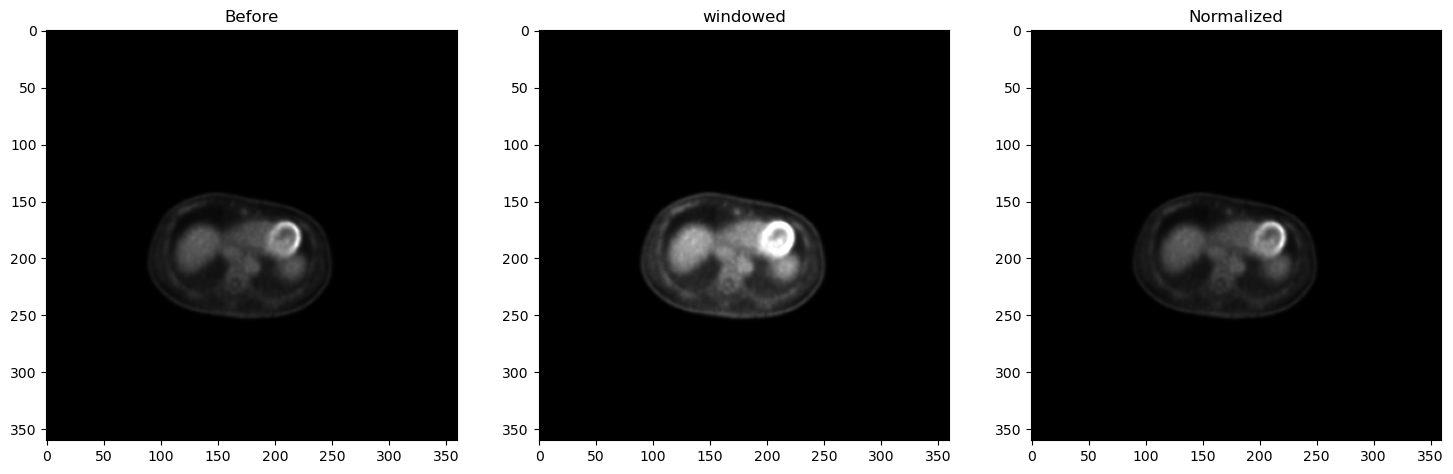

In [96]:
uExplorer_dir = "uExplorer/1st_uExplorer"
directory_name = "Anonymous_ANO_20220224_1851132_093851/2.886 x 600 WB NORMAL"
file_index = 231 # start from 1
dataVolume = loadPETValue(os.path.join(dataset_dir, uExplorer_dir, directory_name))
scaleFactor = calScaleFactor(dataVolume)
print(scaleFactor * 5, scaleFactor)
pixel_array = dataVolume[file_index+1]
windowed_image = (pixel_array) / min(scaleFactor * 5, np.max(dataVolume)) * 255.0
windowed_image = np.clip(windowed_image, 0, 255).astype(np.uint16)

normalized_image = MaxMinNormalizer(pixel_array)
original_image = pixel_array*255.0/ds.WindowWidth

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap="gray")
plt.title('Before')
plt.subplot(1,3,2)
plt.imshow(windowed_image, cmap="gray")
plt.title('windowed')
plt.subplot(1,3,3)
plt.imshow(normalized_image, cmap="gray")
plt.title('Normalized')
plt.show()

In [78]:
import matplotlib.image as mpimg
def transfer_png_anonymous_dir(directory, dose_req = "NORMAL", NORMALIZE = True):
    """
    Count the number of files in directories that start with 'Anonymous_' in the given directory.

    :param directory: Path to the directory to search in.
    :param dose_req: Dose to transfer to PNG.
    :param NORMALIZE: Whether normalize the image
    :return: Whether transfer succfully.
    """
    directory_name = directory.split("/")[-1]

    if directory_name.startswith('Anonymous_'):
        for folder_name in os.listdir(directory):
            dose_type = folder_name.split(" ")[-1]
            if dose_type == dose_req:
                # first_file = os.listdir(os.path.join(directory, folder_name))[0]
                data = loadPETValue(os.path.join(directory, folder_name))
                if NORMALIZE:
                    scaleFactor = calScaleFactor(data)
                    data = data * 255.0 / (scaleFactor * 10)
                    print(f"Mean: {scaleFactor}, scaleFactor:{scaleFactor * 10}")    
                else:
                    data = MaxMinNormalizer(data)                  
                for i in range(1,len(data)+1,1):
                # for file_name in os.listdir(os.path.join(directory, folder_name)):
                #     full_file_name = os.path.join(directory, folder_name, file_name)
                #     ds = pydicom.dcmread(full_file_name)
                #     pixel_array = ds.pixel_array
                #     windowed_image = window_pixel_array(ds)
                    # if NORMALIZE:
                    #     normalized_image = MaxMinNormalizer(windowed_image)
                    #     saved_image = normalized_image
                    # else:
                    #     saved_image = windowed_image
                    image = data[i-1]
                    saved_folder = os.path.join(dataset_dir,"uExplorer", "pngImage", dose_type)
                    if not os.path.exists(saved_folder):
                        os.makedirs(saved_folder )
                    saved_name = dose_type+"_"+ directory_name+"_"+str(i)+".png"
                    mpimg.imsave(os.path.join(saved_folder,saved_name), image, cmap='gray')
        return True
    return False

In [80]:
transfer_number = 14
dose_req = "NORMAL"
NORMALIZE = False

dose_list = ["NORMAL", "D2", "D4", "D10", "D20", "D50", "D100"]
err_results = []
err_cnt = 0
tot_cnt = 0
for folder_name in sorted(os.listdir(os.path.join(dataset_dir, uExplorer_dir))):
    print('Dose: {}, Transfer {} to png...'.format(dose_req, folder_name))
    folder_path = os.path.join(dataset_dir, uExplorer_dir, folder_name)
    result = transfer_png_anonymous_dir(folder_path, dose_req, NORMALIZE)
    tot_cnt+=1
    if not result:
        err_results.append(tot_cnt)
        err_cnt+=1
    if tot_cnt >= transfer_number:
        break
print("Successfully transfer {} to png.".format(tot_cnt))
if err_cnt != 0:
    print("Failed to transfer {} to png. Failed number: {}".format(err_cnt, err_results))
    

Dose: NORMAL, Transfer Anonymous_ANO_20220224_1824561_122859 to png...
50.05656472997267 397.97796951891667
Mean: 397.97796951891667, scaleFactor:3979.779695189167
Dose: NORMAL, Transfer Anonymous_ANO_20220224_1826572_121743 to png...
57.021643277750265 445.13972566235225
Mean: 445.13972566235225, scaleFactor:4451.3972566235225
Dose: NORMAL, Transfer Anonymous_ANO_20220224_1828586_120633 to png...
51.046210605727076 426.65664871525246
Mean: 426.65664871525246, scaleFactor:4266.566487152524
Dose: NORMAL, Transfer Anonymous_ANO_20220224_1831028_115350 to png...
14.0634492460514 131.59606982751765
Mean: 131.59606982751765, scaleFactor:1315.9606982751766
Dose: NORMAL, Transfer Anonymous_ANO_20220224_1833020_114003 to png...
50.33880992836571 353.64226132188503
Mean: 353.64226132188503, scaleFactor:3536.4226132188505
Dose: NORMAL, Transfer Anonymous_ANO_20220224_1835039_111917 to png...
6.790491843688661 71.37438018731527
Mean: 71.37438018731527, scaleFactor:713.7438018731527
Dose: NORMAL, 